### [Problem 1] Function for finding impureness

In [11]:
import numpy as np

def gini_impurity(y):
    """
    Calculate the Gini impurity for a list of class labels.
    
    Parameters
    ----------
    y : array-like, shape (n_samples,)
        List of class labels.
    
    Returns
    -------
    gini : float
        Gini impurity.
    """
    m = len(y)
    if m == 0:
        return 0

    class_counts = np.bincount(y)
    class_probs = class_counts / m
    gini = 1 - np.sum(class_probs ** 2)
    return gini

In [12]:


class ScratchDecisionTreeClassifierDepth1:
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.threshold = None
        self.feature_index = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer values of training data
        """
        best_gini = float('inf')
        best_split = None

        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue  # Skip if either subset is empty

                left_gini = gini_impurity(y[left_indices])
                right_gini = gini_impurity(y[right_indices])

                gini = (np.sum(left_indices) * left_gini + np.sum(right_indices) * right_gini) / n_samples

                if self.verbose:
                    print(f'Feature {feature_index}, Threshold {threshold:.2f}, Gini {gini:.4f}')
                    print(f'  Left class distribution: {np.bincount(y[left_indices])}')
                    print(f'  Right class distribution: {np.bincount(y[right_indices])}')

                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_class': np.bincount(y[left_indices]).argmax(),
                        'right_class': np.bincount(y[right_indices]).argmax()
                    }

        self.feature_index = best_split['feature_index']
        self.threshold = best_split['threshold']
        self.left_class = best_split['left_class']
        self.right_class = best_split['right_class']

        if self.verbose:
            print(f'Best split: feature {self.feature_index} at threshold {self.threshold}')
            print(f'Left class: {self.left_class}, Right class: {self.right_class}')

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of test data

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        y_pred = np.where(X[:, self.feature_index] < self.threshold, self.left_class, self.right_class)
        return y_pred


In [13]:
# Example usage
X = np.array([[2.5, 1, 5],
              [1.0, 0, 4],
              [3.5, 1, 6],
              [2.0, 1, 3],
              [4.0, 0, 7]])
y = np.array([1, 0, 1, 0, 1])

tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X, y)
predictions = tree.predict(X)
print(predictions)

Feature 0, Threshold 2.00, Gini 0.3000
  Left class distribution: [1]
  Right class distribution: [1 3]
Feature 0, Threshold 2.50, Gini 0.0000
  Left class distribution: [2]
  Right class distribution: [0 3]
Feature 0, Threshold 3.50, Gini 0.2667
  Left class distribution: [2 1]
  Right class distribution: [0 2]
Feature 0, Threshold 4.00, Gini 0.4000
  Left class distribution: [2 2]
  Right class distribution: [0 1]
Feature 1, Threshold 1.00, Gini 0.4667
  Left class distribution: [1 1]
  Right class distribution: [1 2]
Feature 2, Threshold 4.00, Gini 0.3000
  Left class distribution: [1]
  Right class distribution: [1 3]
Feature 2, Threshold 5.00, Gini 0.0000
  Left class distribution: [2]
  Right class distribution: [0 3]
Feature 2, Threshold 6.00, Gini 0.2667
  Left class distribution: [2 1]
  Right class distribution: [0 2]
Feature 2, Threshold 7.00, Gini 0.4000
  Left class distribution: [2 2]
  Right class distribution: [0 1]
Best split: feature 0 at threshold 2.5
Left class: 0, 

### [Problem 2] Function for finding information gain


In [15]:
def information_gain(parent, left, right):
    """
    Calculate the information gain for a split.

    Parameters
    ----------
    parent : array-like, shape (n_samples,)
        List of class labels in the parent node.
    left : array-like, shape (n_samples,)
        List of class labels in the left child node.
    right : array-like, shape (n_samples,)
        List of class labels in the right child node.

    Returns
    -------
    ig : float
        Information gain.
    """
    parent_impurity = gini_impurity(parent)
    left_impurity = gini_impurity(left)
    right_impurity = gini_impurity(right)
    
    N = len(parent)
    N_left = len(left)
    N_right = len(right)
    
    weighted_impurity = (N_left / N) * left_impurity + (N_right / N) * right_impurity
    ig = parent_impurity - weighted_impurity
    
    return ig

# Example usage
parent = np.array([1]*15 + [2]*15)  # 15 samples of class 1, 15 samples of class 2
left = np.array([1]*10 + [2]*30)    # 10 samples of class 1, 30 samples of class 2
right = np.array([1]*20 + [2]*5)    # 20 samples of class 1, 5 samples of class 2

# Calculate and print information gain
ig = information_gain(parent, left, right)
print(f'Information Gain: {ig:.3f}')


Information Gain: -0.267


In [17]:
def gini_impurity(y):
    m = len(y)
    return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

def information_gain(parent, left, right):
    parent_impurity = gini_impurity(parent)
    left_impurity = gini_impurity(left)
    right_impurity = gini_impurity(right)
    
    N = len(parent)
    N_left = len(left)
    N_right = len(right)
    
    weighted_impurity = (N_left / N) * left_impurity + (N_right / N) * right_impurity
    ig = parent_impurity - weighted_impurity
    
    return ig

# Corrected example usage
parent = np.array([1]*15 + [2]*15)  # 15 samples of class 1, 15 samples of class 2
left = np.array([1]*10 + [2]*5)    # 10 samples of class 1, 5 samples of class 2
right = np.array([1]*5 + [2]*10)    # 5 samples of class 1, 10 samples of class 2

# Calculate and print information gain
ig = information_gain(parent, left, right)
print(f'Information Gain (Corrected): {ig:.3f}')


Information Gain (Corrected): 0.056


### Trial

In [2]:
def calculate_gini_impurity(samples_per_class):
    """
    Calculate the Gini impurity for a node.

    Parameters:
    samples_per_class (list): List containing the number of samples for each class.

    Returns:
    float: Gini impurity value.
    """
    total_samples = sum(samples_per_class)
    gini_impurity = 1.0

    for samples in samples_per_class:
        if total_samples == 0:
            continue
        probability = samples / total_samples
        gini_impurity -= probability ** 2

    return gini_impurity

In [3]:
# Test the function with examples
examples = [
    [15, 15],   # Class 1: 15 samples, Class 2: 15 samples
    [15, 15, 15],   # Class 1: 15 samples, Class 2: 15 samples, Class 3: 15 samples
    [18, 12],   # Class 1: 18 samples, Class 2: 12 samples
    [30, 0]     # Class 1: 30 samples, Class 2: 0 samples
]

In [4]:
for idx, example in enumerate(examples, start=1):
    gini_impurity = calculate_gini_impurity(example)
    print(f"Example {idx}: Gini impurity {gini_impurity:.3f}")


Example 1: Gini impurity 0.500
Example 2: Gini impurity 0.667
Example 3: Gini impurity 0.480
Example 4: Gini impurity 0.000


### last trial

In [18]:
import numpy as np

class ScratchDecisionTreeClassifierDepth1:
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def gini_impurity(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def information_gain(self, parent, left, right):
        parent_impurity = self.gini_impurity(parent)
        left_impurity = self.gini_impurity(left)
        right_impurity = self.gini_impurity(right)

        N = len(parent)
        N_left = len(left)
        N_right = len(right)

        weighted_impurity = (N_left / N) * left_impurity + (N_right / N) * right_impurity
        ig = parent_impurity - weighted_impurity

        return ig

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_ig = -1
        best_split = None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                if np.any(left_indices) and np.any(right_indices):
                    left_y = y[left_indices]
                    right_y = y[right_indices]

                    ig = self.information_gain(y, left_y, right_y)

                    if self.verbose:
                        print(f'Feature {feature_index}, Threshold {threshold:.2f}, IG {ig:.4f}')
                        print(f'  Left class distribution: {np.bincount(left_y)}')
                        print(f'  Right class distribution: {np.bincount(right_y)}')

                    if ig > best_ig:
                        best_ig = ig
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'left_class': np.bincount(left_y).argmax(),
                            'right_class': np.bincount(right_y).argmax()
                        }

        self.feature_index = best_split['feature_index']
        self.threshold = best_split['threshold']
        self.left_class = best_split['left_class']
        self.right_class = best_split['right_class']

        if self.verbose:
            print(f'Best split: feature {self.feature_index} at threshold {self.threshold:.2f}')
            print(f'Left class: {self.left_class}, Right class: {self.right_class}')

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        predictions = np.where(X[:, self.feature_index] <= self.threshold, self.left_class, self.right_class)
        return predictions

# Example usage
X = np.array([[2, 1, 4], [3, 1, 5], [1, 1, 6], [4, 0, 7], [2, 0, 8]])
y = np.array([1, 0, 1, 0, 1])

tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X, y)
predictions = tree.predict(X)
print(predictions)


Feature 0, Threshold 1.00, IG 0.0800
  Left class distribution: [0 1]
  Right class distribution: [2 2]
Feature 0, Threshold 2.00, IG 0.4800
  Left class distribution: [0 3]
  Right class distribution: [2]
Feature 0, Threshold 3.00, IG 0.1800
  Left class distribution: [1 3]
  Right class distribution: [1]
Feature 1, Threshold 0.00, IG 0.0133
  Left class distribution: [1 1]
  Right class distribution: [1 2]
Feature 2, Threshold 4.00, IG 0.0800
  Left class distribution: [0 1]
  Right class distribution: [2 2]
Feature 2, Threshold 5.00, IG 0.0133
  Left class distribution: [1 1]
  Right class distribution: [1 2]
Feature 2, Threshold 6.00, IG 0.0133
  Left class distribution: [1 2]
  Right class distribution: [1 1]
Feature 2, Threshold 7.00, IG 0.0800
  Left class distribution: [2 2]
  Right class distribution: [0 1]
Best split: feature 0 at threshold 2.00
Left class: 1, Right class: 0
[1 0 1 0 1]


### [Problem 2] Function for finding information gain

Feature 0, Threshold 1.00, IG 0.0800
  Left class distribution: [1]
  Right class distribution: [2 2]
Feature 0, Threshold 2.00, IG 0.0133
  Left class distribution: [1 1]
  Right class distribution: [2 1]
Feature 0, Threshold 3.00, IG 0.0133
  Left class distribution: [2 1]
  Right class distribution: [1 1]
Feature 0, Threshold 4.00, IG 0.0800
  Left class distribution: [2 2]
  Right class distribution: [1]
Feature 1, Threshold 1.00, IG 0.0800
  Left class distribution: [1]
  Right class distribution: [2 2]
Feature 1, Threshold 2.00, IG 0.0133
  Left class distribution: [2 1]
  Right class distribution: [1 1]
Best split: feature 0 at threshold 1.00
Left class: 0, Right class: 0


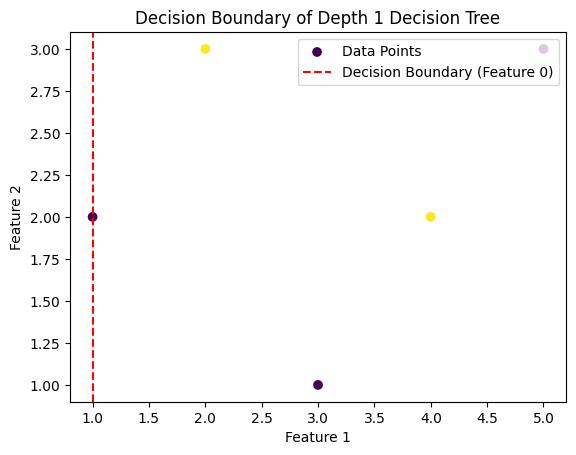

In [19]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifierDepth1:
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def gini_impurity(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def information_gain(self, parent, left, right):
        parent_impurity = self.gini_impurity(parent)
        left_impurity = self.gini_impurity(left)
        right_impurity = self.gini_impurity(right)

        N = len(parent)
        N_left = len(left)
        N_right = len(right)

        weighted_impurity = (N_left / N) * left_impurity + (N_right / N) * right_impurity
        ig = parent_impurity - weighted_impurity

        return ig

    def fit(self, X, y):
        best_ig = -1
        best_split = None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                if np.any(left_indices) and np.any(right_indices):
                    left_y = y[left_indices]
                    right_y = y[right_indices]

                    ig = self.information_gain(y, left_y, right_y)

                    if self.verbose:
                        print(f'Feature {feature_index}, Threshold {threshold:.2f}, IG {ig:.4f}')
                        print(f'  Left class distribution: {np.bincount(left_y)}')
                        print(f'  Right class distribution: {np.bincount(right_y)}')

                    if ig > best_ig:
                        best_ig = ig
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'left_class': np.bincount(left_y).argmax(),
                            'right_class': np.bincount(right_y).argmax()
                        }

        self.feature_index = best_split['feature_index']
        self.threshold = best_split['threshold']
        self.left_class = best_split['left_class']
        self.right_class = best_split['right_class']

        if self.verbose:
            print(f'Best split: feature {self.feature_index} at threshold {self.threshold:.2f}')
            print(f'Left class: {self.left_class}, Right class: {self.right_class}')

    def predict(self, X):
        predictions = np.where(X[:, self.feature_index] <= self.threshold, self.left_class, self.right_class)
        return predictions

    def plot_decision_boundary(self, X, y):
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Data Points')
        
        # Plot decision boundary
        plt.axvline(x=self.threshold, color='r', linestyle='--', label=f'Decision Boundary (Feature {self.feature_index})')
        
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary of Depth 1 Decision Tree')
        plt.legend()
        plt.show()

# Example usage
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [5, 3]])
y = np.array([0, 1, 0, 1, 0])

tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X, y)

# Plot decision boundary
tree.plot_decision_boundary(X, y)
